In [1]:
import numpy as np
import astropy.units as u
import yaml
import h5py
from astropy.constants import G
import gala.integrate as gi
import gala.dynamics as gd
import gala.coordinates as gc
import gala.potential as gp
import gala.units as gu
from gala.units import galactic
import os.path
import sys
from argparse import ArgumentParser
import pathlib
from scipy.spatial.transform import Rotation
import astropy.units as u
from astropy.coordinates import SkyCoord

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"
plt.style.use('my_standard.mplstyle')

galcen_v_sun = (11.1, 245, 7.3)*u.km/u.s
galcen_distance = 8.249*u.kpc

In [2]:
print("loading mwlmc model...")
from mwlmc import model as mwlmc_model
print("mwlmc_model has been called...")
Model = mwlmc_model.MWLMC()
print("mwlmc model successfully loaded and set!")

loading mwlmc model...
mwlmc_model has been called...
Initialising MW ... 
sphcoefs::read_coef_file: reading coefficients from file . . . success!!
Initialising LMC ... 
sphcoefs::read_coef_file: reading coefficients from file . . . success!!
Initialising MW disc ... 
cylcoefs::read_simple_coef_file: reading coefficients from file . . . success!!
mwlmc model successfully loaded and set!


sphcache::read_sph_cache: trying to read cached table . . . success!!
sphcache::read_sph_cache: trying to read cached table . . . success!!
cylcache::read_cyl_cache: trying to read cached table . . . success!!


In [3]:
with h5py.File('../analysis/stream-runs/high-vel-dis/stream15/rigid-mwhalo.hdf5','r') as file:
    print(file.keys())
    print(np.array(file["pericenter"]), np.array(file["apocenter"]))
    print("The local velocity dispersion is {} km/s:".format( np.array(file["loc_veldis"])))
    xs_rigidmwhalo = np.array(file['positions'])
    vs_rigidmwhalo = np.array(file['velocities'])

with h5py.File('../analysis/stream-runs/high-vel-dis/stream15/rigid-mwhalodisc.hdf5','r') as file:
    print("The local velocity dispersion is {} km/s:".format( np.array(file["loc_veldis"])))
    xs_rigidmwhalodisc = np.array(file['positions'])
    vs_rigidmwhalodisc = np.array(file['velocities'])

with h5py.File('../analysis/stream-runs/high-vel-dis/stream15/rigid-mwhalo-lmc.hdf5','r') as file:
    print("The local velocity dispersion is {} km/s:".format( np.array(file["loc_veldis"])))
    xs_rigidmwhalo_lmc = np.array(file['positions'])
    vs_rigidmwhalo_lmc = np.array(file['velocities'])

with h5py.File('../analysis/stream-runs/high-vel-dis/stream15/rigid-mwhalodisc-lmc.hdf5','r') as file:
    print("The local velocity dispersion is {} km/s:".format( np.array(file["loc_veldis"])))
    xs_rigidmwhalodisc_lmc = np.array(file['positions'])
    vs_rigidmwhalodisc_lmc = np.array(file['velocities'])

with h5py.File('../analysis/stream-runs/high-vel-dis/stream15/rigid-mwhalodisc-deformlmc.hdf5','r') as file:
    xs_rigidmwhalodisc_deformlmc = np.array(file['positions'])
    vs_rigidmwhalodisc_deformlmc = np.array(file['velocities'])

<KeysViewHDF5 ['L', 'Lx', 'Lz', 'apocenter', 'energies', 'grad_track_deform', 'lengths', 'lmc_sep', 'loc_veldis', 'pericenter', 'pm_misalignment', 'pole_b', 'pole_l', 'positions', 'potential', 'progenitor-ics', 'progenitor-mass', 'progenitor-scale', 'times', 'track_deform', 'velocities', 'widths']>
6.686796102397926 16.746852980473264
The local velocity dispersion is 6.268909839288527 km/s:
The local velocity dispersion is 43.2432787891199 km/s:
The local velocity dispersion is 4.214101956309677 km/s:
The local velocity dispersion is 33.75758448324815 km/s:


Text(0, 0.5, 'z [kpc]')

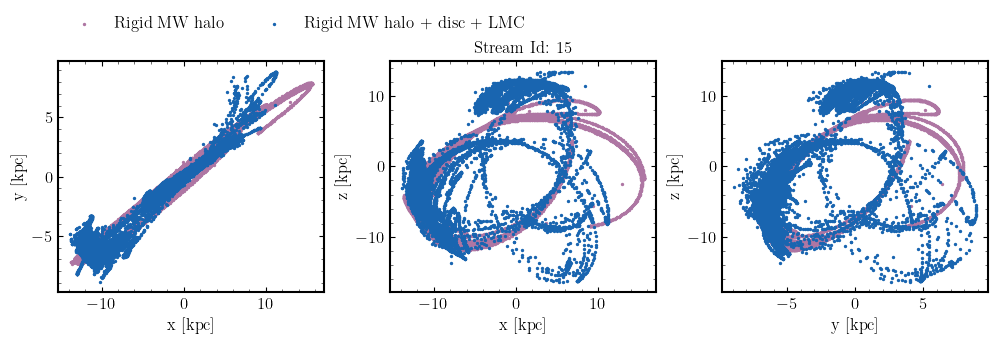

In [5]:
fig, ax = plt.subplots(1,3, figsize=(12,3))

plt.subplots_adjust(wspace=0.25)

plt.sca(ax[0])
plt.scatter(xs_rigidmwhalo[-1][:,0], xs_rigidmwhalo[-1][:,1], s=2, label='Rigid MW halo', rasterized=True)
# plt.scatter(xs_rigidmwhalodisc[-1][:,0], xs_rigidmwhalodisc[-1][:,1], s=2, label='Rigid MW halo + disc', rasterized=True)
# plt.scatter(xs_rigidmwhalo_lmc[-1][:,0], xs_rigidmwhalo_lmc[-1][:,1], s=2, label='Rigid MW halo + LMC', rasterized=True)
plt.scatter(xs_rigidmwhalodisc_lmc[-1][:,0], xs_rigidmwhalodisc_lmc[-1][:,1], s=2, label='Rigid MW halo + disc + LMC', rasterized=True)
# plt.scatter(xs_rigidmwhalodisc_deformlmc[-1][:,0], xs_rigidmwhalodisc_deformlmc[-1][:,1], s=2, label='Rigid MW halo + disc + deforming LMC', rasterized=True)
plt.legend(ncol=3, frameon=False, fontsize=12, loc=(.01, 1.1))

plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')

plt.sca(ax[1])
plt.scatter(xs_rigidmwhalo[-1][:,0], xs_rigidmwhalo[-1][:,2], s=2, rasterized=True)
# plt.scatter(xs_rigidmwhalodisc[-1][:,0], xs_rigidmwhalodisc[-1][:,2], s=2, label='Rigid MW halo + disc', rasterized=True)
# plt.scatter(xs_rigidmwhalo_lmc[-1][:,0], xs_rigidmwhalo_lmc[-1][:,2], s=2, label='Rigid MW halo + LMC', rasterized=True)
plt.scatter(xs_rigidmwhalodisc_lmc[-1][:,0], xs_rigidmwhalodisc_lmc[-1][:,2], s=2, label='Rigid MW halo + disc + lmc', rasterized=True)
# plt.scatter(xs_rigidmwhalodisc_deformlmc[-1][:,0], xs_rigidmwhalodisc_deformlmc[-1][:,2], s=2, label='Rigid MW halo + disc + deforming lmc', rasterized=True)

plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.title('Stream Id: 15')

plt.sca(ax[2])
plt.scatter(xs_rigidmwhalo[-1][:,1], xs_rigidmwhalo[-1][:,2], s=2, rasterized=True)
# plt.scatter(xs_rigidmwhalodisc[-1][:,1], xs_rigidmwhalodisc[-1][:,2], s=2, label='Rigid MW halo + disc', rasterized=True)
# plt.scatter(xs_rigidmwhalo_lmc[-1][:,1], xs_rigidmwhalo_lmc[-1][:,2], s=2, label='Rigid MW halo + LMC', rasterized=True)
plt.scatter(xs_rigidmwhalodisc_lmc[-1][:,1], xs_rigidmwhalodisc_lmc[-1][:,2], s=2, label='Rigid MW halo + disc + lmc', rasterized=True)
# plt.scatter(xs_rigidmwhalodisc_deformlmc[-1][:,1], xs_rigidmwhalodisc_deformlmc[-1][:,2], s=2, label='Rigid MW halo + disc + deforming lmc', rasterized=True)

plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
#
# plt.savefig('figures/high-vel-dis/stream15-2d-potcomp')

Text(0.5, 0.92, 'Stream Id: 15')

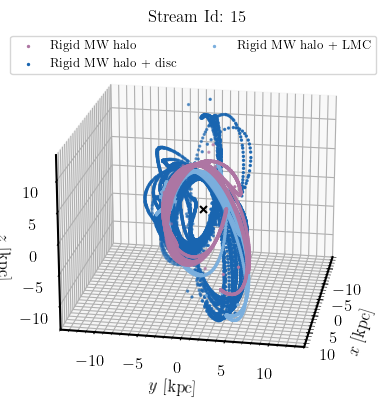

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs_rigidmwhalo[-1][:,0], xs_rigidmwhalo[-1][:,1], xs_rigidmwhalo[-1][:,2], 'o', s=2, label='Rigid MW halo', rasterized=True)
ax.scatter(xs_rigidmwhalodisc[-1][:,0], xs_rigidmwhalodisc[-1][:,1], xs_rigidmwhalodisc[-1][:,2], 'o', s=2, label='Rigid MW halo + disc', rasterized=True)
ax.scatter(xs_rigidmwhalo_lmc[-1][:,0], xs_rigidmwhalo_lmc[-1][:,1], xs_rigidmwhalo_lmc[-1][:,2], 'o', s=2, label='Rigid MW halo + LMC', rasterized=True)
# ax.scatter(xs_rigidmwhalodisc_lmc[-1][:,0], xs_rigidmwhalodisc_lmc[-1][:,1], xs_rigidmwhalodisc_lmc[-1][:,2], 'o', label='Rigid MW halo + disc + lmc', s=2, rasterized=True)
# ax.scatter(xs_rigidmwhalodisc_deformlmc[-1][:,0], xs_rigidmwhalodisc_deformlmc[-1][:,1], xs_rigidmwhalodisc_deformlmc[-1][:,2], 'o', label='Rigid MW halo + disc + deform lmc', s=2, rasterized=True)

ax.scatter(0,0,0, s=25, marker='x',color='k')

plt.legend(frameon=True, ncol=2, fontsize=9, loc='upper right')

ax.view_init(azim = 10, elev =20)

ax.set_xlim(-14,14)
ax.set_ylim(-14,14)
ax.set_zlim(-14,14)
ax.set_xlabel(r'$x$ [kpc]')
ax.set_ylabel(r'$y$ [kpc]')
ax.set_zlabel(r'$z$ [kpc]')

plt.title('Stream Id: 15')

# plt.savefig('figures/high-vel-dis/stream15-3d-potcomp')

Comparing the disc profiles of SL and NGC MW potentials

In [11]:
import agama

mass_unit =222296
agama.setUnits(length=1, velocity=0.977792, mass=mass_unit)
timeUnitGyr = agama.getUnits()['time'] / 1e3

agama.getUnits()
# usys = gu.UnitSystem(u.kpc, 1000.00022672*u.Myr, mass_unit*u.Msun, u.radian, u.km/u.s)

{'length': <Quantity 1. kpc>,
 'velocity': <Quantity 0.977792 km / s>,
 'time': <Quantity 1000.00022672 Myr>,
 'mass': <Quantity 222296. solMass>}

In [42]:
# Nico's
# ngc_potmwhalo = agama.Potential(type = 'Dehnen', mass = 1.57e12/mass_unit, scaleRadius  = 40.8, gamma = 1) # Hernquist when gamma=1
ngc_potmwbulge = agama.Potential(type = 'Dehnen', mass = 0.7e10/mass_unit, scaleRadius = 0.7, gamma = 1) # Hernquist when gamma=1
ngc_potmwdisc = agama.Potential(type='Disk', mass=5.78e10/mass_unit, ScaleRadius=3.5, ScaleHeight= 0.5)
ngc_totmwpot = agama.Potential(ngc_potmwbulge, ngc_potmwdisc)

# Sophia's 
# sl_potmwhalo = agama.Potential(type = 'Dehnen', mass = 1.57e12/mass_unit, scaleRadius  = 40.8, gamma = 1) # Hernquist when gamma=1
sl_potmwbulge = agama.Potential(type = 'Dehnen', mass = 0.5e10/mass_unit, scaleRadius = 0.7, gamma = 1) # Hernquist when gamma=1
sl_potmwdisc = agama.Potential(type='MiyamotoNagai', mass=6.8e10/mass_unit, ScaleRadius=3.0, ScaleHeight= 0.28)
sl_totmwpot = agama.Potential(sl_potmwbulge, sl_potmwdisc)

In [39]:
N = 300
rs = np.zeros(shape=(N, 3))
rs[:,0] = np.linspace(0,300,N) # in kpc

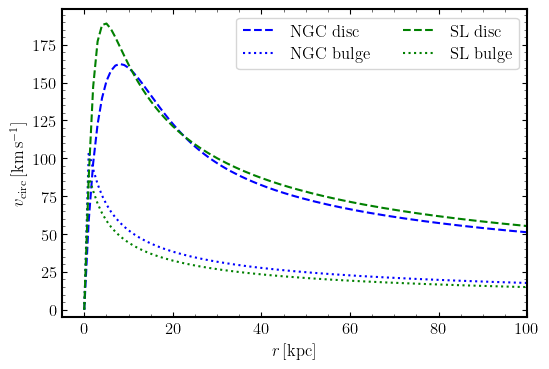

In [45]:
plt.figure(figsize=(6,4))

plt.plot(rs.T[0], ((-ngc_potmwdisc.force(rs) * rs)**.5).T[0], c='b', ls='dashed',label='NGC disc' )
plt.plot(rs.T[0], ((-ngc_potmwbulge.force(rs) * rs)**.5).T[0], c='b', ls='dotted', label='NGC bulge' )
# plt.plot(rs.T[0], ((-ngc_totmwpot.force(rs) * rs)**.5).T[0], c='b', ls='solid', label='NGC total' )


plt.plot(rs.T[0], ((-sl_potmwdisc.force(rs) * rs)**.5).T[0], c='g',  ls='dashed',label='SL disc' )
plt.plot(rs.T[0], ((-sl_potmwbulge.force(rs) * rs)**.5).T[0], c='g', ls='dotted', label='SL bulge' )
# plt.plot(rs.T[0], ((-sl_totmwpot.force(rs) * rs)**.5).T[0], c='g', ls='solid', label='SL total' )


plt.xlabel(r'$r\,[\mathrm{kpc}]$')
plt.ylabel(r'$v_{\mathrm{circ}}\,[\mathrm{km}\,\mathrm{s}^{-1}]$')
plt.xlim(-5,100)
plt.ylim(-5,)

plt.legend(ncol=2)